
## **Data Science:: Healthcare - Persistency of a drug**

## Step 1: Introduction

**Context:**

In this project, we are trying to understand the persistency of drug as per the physician prescription.

**Objectives:**

gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

**Target Variable:** Persistency_Flag

**Tasks:**

1. Problem understanding
2. Data Understanding
3. Data Cleaning and Feature engineering
4. Model Development
5. Model Selection
6. Model Evaluation
7. Report the accuracy, precision and recall of both the class of target variable
8. Report ROC-AUC as well
9. Deploy the model
10. Explain the challenges and model selection

**Dataset:** Healthcare_dataset.xlsx

**Feature Description:**

- Patient ID: 	Unique ID of each patient.
- Persistency_Flag:	Flag indicating if a patient was persistent or not.
- Age:	Age of the patient during their therapy.
- Race:	Race of the patient from the patient table.
- Region:	Region of the patient from the patient table.
- Ethnicity:	Ethnicity of the patient from the patient table.
- Gender:	Gender of the patient from the patient table.
- IDN Indicator:	Flag indicating patients mapped to IDN.
- NTM - Physician Specialty:	Specialty of the HCP that prescribed the NTM Rx.
- NTM - T-Score: T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)
- Change in T Score: 	Change in Tscore before starting with any therapy and after receiving therapy  (Worsened, Remained Same, Improved, Unknown)
- NTM - Risk Segment:	Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate).
- Change in Risk Segment:	Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown).
- NTM - Multiple Risk Factors:	Flag indicating if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate).
- NTM - Dexa Scan: Frequency	Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate).
- NTM - Dexa Scan Recency:	Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable).
- Dexa During Therapy:	Flag indicating if the patient had a Dexa Scan during their first continuous therapy.
- NTM - Fragility Fracture Recency:	Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate).
- Fragility Fracture During Therapy:	Flag indicating if the patient had fragility fracture  during their first continuous therapy.
- NTM - Glucocorticoid Recency:	Flag indicating usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx.
- Glucocorticoid Usage During Therapy:	Flag indicating if the patient had a Glucocorticoid usage during the first continuous therapy.
- NTM - Injectable Experience:	Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx.
- NTM - Risk Factors:	Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx.
- NTM - Comorbidity: 	Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied.
- NTM - Concomitancy:	Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate).
- Adherence:	Adherence for the therapies

## Step 2: Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step 3: Loading the Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
data = pd.read_excel('/content/drive/My Drive/Healthcare_dataset.xlsx', sheet_name='Dataset')

In [8]:
# Mkaing a copy of tha dataset:
df = data.copy()

In [9]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [10]:
# Let's display all the columns :
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(df)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,Comorb_Encounter_For_Immunization.1,Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,Y,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,Y,Y,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,Y,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,1


In [11]:
df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encounter_For_Immunization.1', 'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Disea

## Step 4: EDA


### A) Basic Data Exploration

In [12]:
df.shape

(3424, 69)

In [13]:
df.size

236256

In [14]:
df.ndim

2

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [16]:
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [17]:
# get some info & statistics about the Numerical data:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dexa_Freq_During_Rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
Count_Of_Risks,3424.0,1.239486,1.094914,0.0,0.0,1.0,2.0,7.0


In [18]:
# get some info & statistics about the Categorical data:
df.describe(include=['object']).T
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.describe(include=['object']).T)

,count,unique,top,freq
Ptid,3424,3424,P1,1
Persistency_Flag,3424,2,Non-Persistent,2135
Gender,3424,2,Female,3230
Race,3424,4,Caucasian,3148
Ethnicity,3424,3,Not Hispanic,3235
Region,3424,5,Midwest,1383
Age_Bucket,3424,4,>75,1439
Ntm_Speciality,3424,36,GENERAL PRACTITIONER,1535
Ntm_Specialist_Flag,3424,2,Others,2013
Ntm_Speciality_Bucket,3424,3,OB/GYN/Others/PCP/Unknown,2104


In [19]:
# searching for any Missing Values:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [20]:
# searching for any duplicated rows:
df[df.duplicated()]

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks


In [21]:
# getting the unique values of all columns:
for i in df.columns:
  print(f'Unique Values in {i} are ')
  print(df[i].unique())
  print('#'*50)

Unique Values in Ptid are 
['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
##################################################
Unique Values in Persistency_Flag are 
['Persistent' 'Non-Persistent']
##################################################
Unique Values in Gender are 
['Male' 'Female']
##################################################
Unique Values in Race are 
['Caucasian' 'Asian' 'Other/Unknown' 'African American']
##################################################
Unique Values in Ethnicity are 
['Not Hispanic' 'Hispanic' 'Unknown']
##################################################
Unique Values in Region are 
['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
##################################################
Unique Values in Age_Bucket are 
['>75' '55-65' '65-75' '<55']
##################################################
Unique Values in Ntm_Speciality are 
['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY

### B) Addressing Skewness

In [23]:
# Identify numerical columns in your dataset
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Apply a transformation to reduce skewness, for example, log transformation
# Ensure to add 1 to avoid log(0) which is undefined
for col in numerical_cols:
    if data[col].skew() > 1:
        data[col] = np.log1p(data[col])



In [24]:
# Apply a transformation to reduce skewness, for example, log transformation
# Ensure to add 1 to avoid log(0) which is undefined
for col in numerical_cols:
    if data[col].skew() > 1:
        data[col] = np.log1p(data[col])


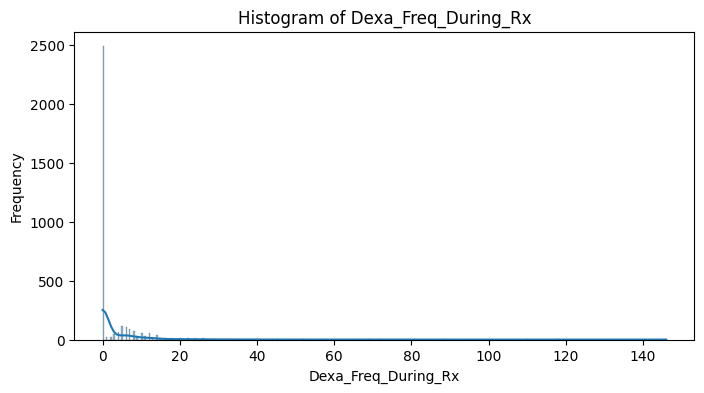

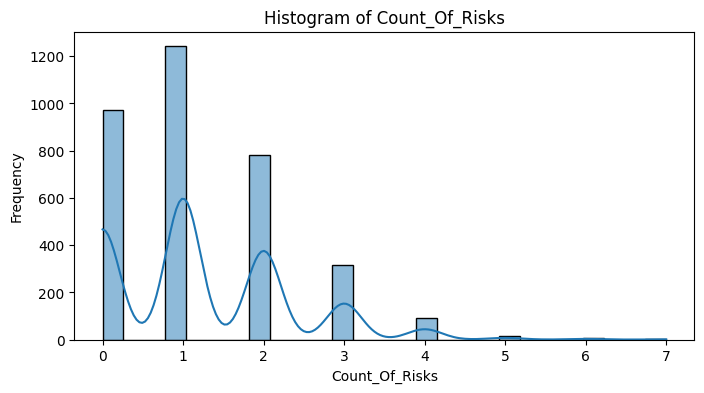

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['Dexa_Freq_During_Rx', 'Count_Of_Risks']

# Plotting histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


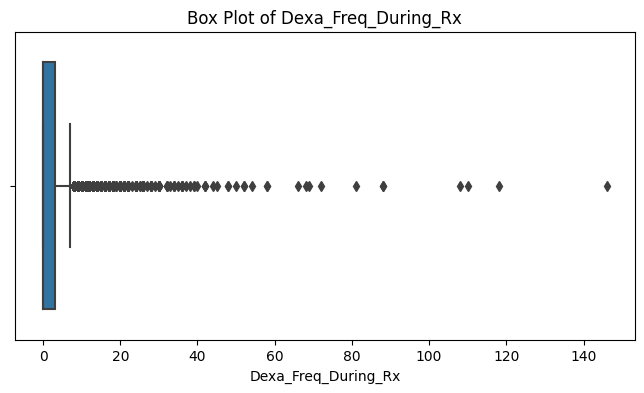

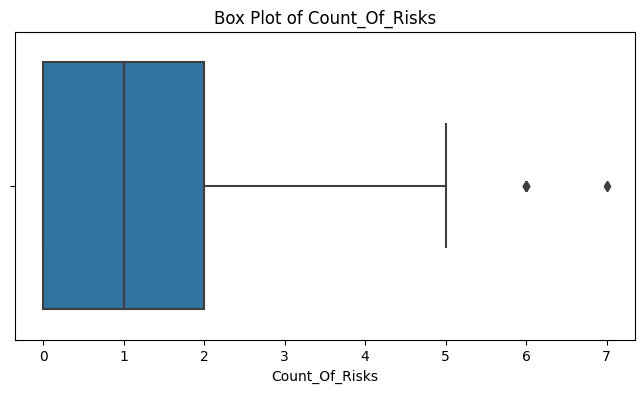

In [26]:
# Plotting box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()
